(750, 1)


E:\software\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


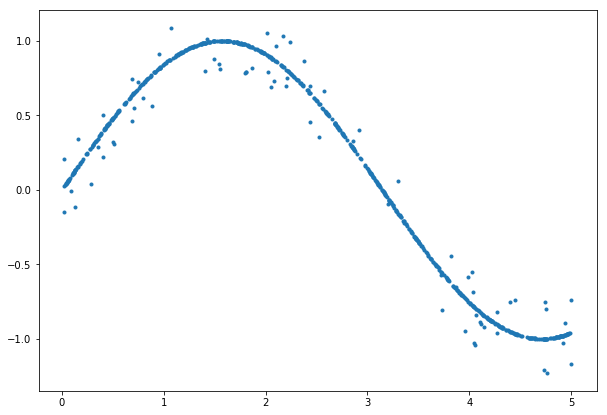

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, cross_validation


def create_regression_data(n):
    '''
    创建回归模型使用的数据集 
    '''
    X = 5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    y[::10] += 0.5 * (0.5 - np.random.rand(int(n / 10)))
    return cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)

X_train, X_test, y_train, y_test = create_regression_data(1000)
print(X_train.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_train.ravel(), y_train, marker='.')
plt.show()

In [2]:
def test_KNeighborsRegressor(*data):
    '''
    测试 KNeighborsRegressor 的用法
    '''
    X_train, X_test, y_train, y_test = data
    regr = neighbors.KNeighborsRegressor()
    regr.fit(X_train, y_train)
    print("Training Score:%f" % regr.score(X_train, y_train))
    print("Testing Score:%f" % regr.score(X_test, y_test))

test_KNeighborsRegressor(X_train, X_test, y_train, y_test)

Training Score:0.996101
Testing Score:0.994151


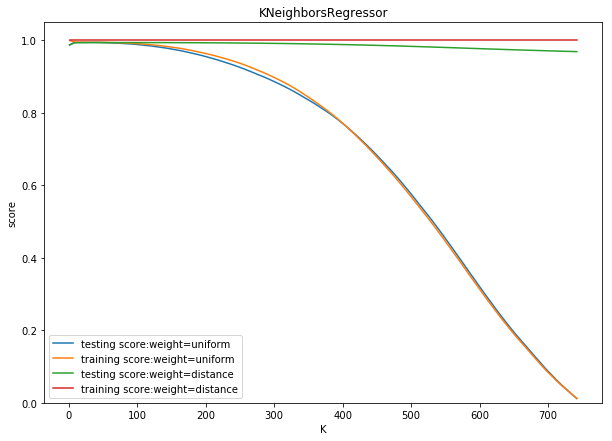

In [3]:
def test_KNeighborsRegressor_k_w(*data):
    '''
    KNeighborsRegressor 中 n_neighbors 和 weights 参数的影响
    '''
    X_train, X_test, y_train, y_test = data
    Ks = np.linspace(1, y_train.size, num=100, endpoint=False, dtype='int')
    weights = ['uniform', 'distance']

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    ### 绘制不同 weights 下， 预测得分随 n_neighbors 的曲线
    for weight in weights:
        training_scores = []
        testing_scores = []
        for K in Ks:
            regr = neighbors.KNeighborsRegressor(weights=weight, n_neighbors=K)
            regr.fit(X_train, y_train)
            testing_scores.append(regr.score(X_test, y_test))
            training_scores.append(regr.score(X_train, y_train))
        ax.plot(Ks, testing_scores, label="testing score:weight=%s" % weight)
        ax.plot(Ks, training_scores, label="training score:weight=%s" % weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()

test_KNeighborsRegressor_k_w(X_train,X_test,y_train,y_test)

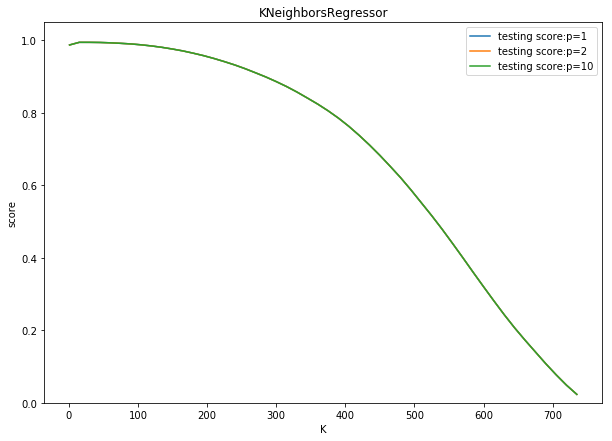

In [4]:
def test_KNeighborsRegressor_k_p(*data):
    '''
    KNeighborsRegressor 中 n_neighbors 和 p 参数的影响
    '''
    X_train, X_test, y_train, y_test = data
    Ks = np.linspace(1, y_train.size, endpoint=False, dtype='int')
    Ps = [1, 2, 10]

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    ### 绘制不同 p 下， 预测得分随 n_neighbors 的曲线
    for P in Ps:
        training_scores = []
        testing_scores = []
        for K in Ks:
            regr = neighbors.KNeighborsRegressor(p=P, n_neighbors=K)
            regr.fit(X_train, y_train)
            testing_scores.append(regr.score(X_test, y_test))
            training_scores.append(regr.score(X_train, y_train))
        ax.plot(Ks, testing_scores, label="testing score:p=%d" % P)
#         ax.plot(Ks, training_scores, label="training score:p=%d" % P)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()

test_KNeighborsRegressor_k_p(X_train,X_test,y_train,y_test)